# Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
from typing import Dict, List, Optional, Tuple
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Custom library
import WeFarmPy

# Load data data
Note that for most personal computers, playing around with the full 6 GB raw csv data is going to be slow and cumbersome.

Recommend for exploratory work to load a subset; converting to parquet will also make subsequent loads much faster.

### Raw data

In [2]:
# Full filepath
fpath_raw = r'/Users/georgelewis/Desktop/Datakind farmer project/raw_data.csv'

In [3]:
### Load subset for playing around / increase responsiveness

# # Read only N rows randomly distributed throughout file
# sample_size = 1500000  # 1.5M rows ~300MB in memory

# # Calculate skip probability to get uniform sample
# total_rows = 20304843  # Full dataset
# skip_prob = 1 - (sample_size / total_rows)

# # Load
# np.random.seed(1)
# df_sample = pd.read_csv(
#     fpath_raw,
#     skiprows=lambda i: i > 0 and np.random.random() > skip_prob,
#     nrows=sample_size  # Safety limit
# )

# # Check there are responses from ke/ug/tz (tz counts are very low)
# df_sample['question_user_country_code'].value_counts()

In [4]:
### Otherwise load the full dataset (much slower)
df_sample = pd.read_csv(fpath_raw)

### Process data
- Ensures datetime columns load correctly
- Standardises country codes and language names
- Adds data completeness info
- Adds temporal data
- Adds season category

In [5]:
processor = WeFarmPy.DataCleaning()
df_sample_clean = processor.process(df_sample)

df_sample_clean

Starting data processing pipeline on 20,304,843 rows...
Parsing datetime columns...
  question_sent:
    Valid: 20,304,843 | Null: 0
    Range: 2017-11-22 12:25:03+00:00 to 2022-06-21 14:31:25.474665+00:00
  response_sent:
    Valid: 20,304,843 | Null: 0
    Range: 2017-11-22 12:28:03+00:00 to 2022-07-07 14:12:45.369580+00:00
  question_user_dob:
    Valid: 1,231,284 | Null: 19,073,559
    Range: 1917-01-13 00:00:00+00:00 to 2020-09-23 00:00:00+00:00
  question_user_created_at:
    Valid: 20,304,843 | Null: 0
    Range: 2014-11-27 15:06:11+00:00 to 2022-04-07 08:05:37.297909+00:00
  response_user_dob:
    Valid: 1,664,688 | Null: 18,640,155
    Range: 1916-02-07 00:00:00+00:00 to 2020-09-23 00:00:00+00:00
  response_user_created_at:
    Valid: 20,304,843 | Null: 0
    Range: 2014-11-27 15:06:11+00:00 to 2022-04-06 04:48:37.656557+00:00
Standardizing country codes to ISO 3166-1 alpha-3...
  question_user_country_code:
    Before: {'ke': 9758607, 'ug': 6312194, 'tz': 4233726, 'gb': 316}


,q_id,q_user_id,q_lang_code,q_text,q_topic,q_datetime,r_id,r_user_id,r_lang_code,r_text,...,season,season_std,q_chars,q_words,r_chars,r_words,completeness_pct,metadata_pct,has_q_topic,has_r_topic
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00:00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',...,season_b_plant,rainy_secondary,44,7,26,5,100.0,0.0,False,False
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00:00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,...,season_b_plant,rainy_secondary,80,17,41,7,100.0,0.0,False,False
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,season_b_plant,rainy_secondary,160,21,117,14,100.0,0.0,True,True
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,season_b_plant,rainy_secondary,160,21,117,14,100.0,0.0,True,True
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,season_b_plant,rainy_secondary,160,21,117,14,100.0,0.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20304838,59258899,3684299,swa,"Naomba,mbegu ya mahindi..nmeishiwa kabisa na s...",maize,2022-05-09 11:46:22.464727+00:00,59258905,2500216,eng,Apply only deficient nutrients for maize and c...,...,long_rains,rainy_main,58,7,128,16,100.0,0.0,True,True
20304839,59259045,2772369,eng,I want to grow cabbage someone to give me the ...,cabbage,2022-05-12 11:30:05.749550+00:00,59259053,3681140,eng,1,...,long_rains,rainy_main,64,12,1,1,100.0,0.0,True,False
20304840,59260982,110220,eng,Q how can i permanently control birds destroyi...,maize,2022-06-11 11:52:34.447200+00:00,59261028,1493318,eng,Open the forum as soon as possible,...,harvest_1,harvest_main,67,12,34,7,100.0,50.0,True,False
20304841,59260982,110220,eng,Q how can i permanently control birds destroyi...,bird,2022-06-11 11:52:34.447200+00:00,59261028,1493318,eng,Open the forum as soon as possible,...,harvest_1,harvest_main,67,12,34,7,100.0,50.0,True,False


# Time analysis

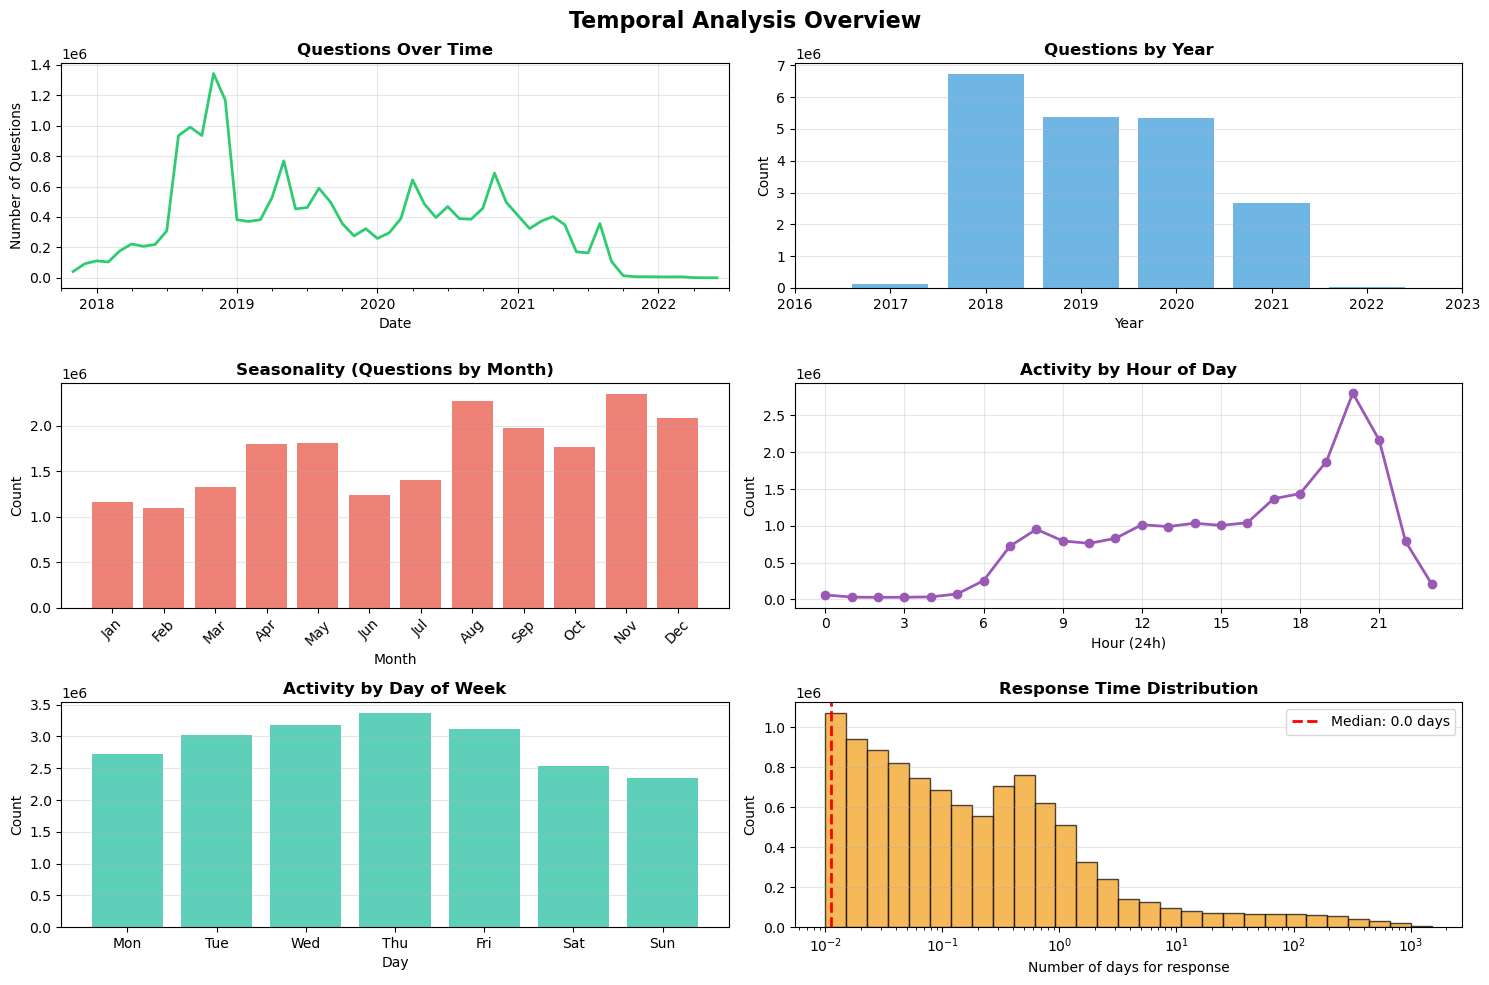

In [6]:
fig = WeFarmPy.EDA.plot_temporal_overview(df_sample_clean)

- Questions appear to peak August to November, being lowest at the start of the calendar year.
- Average response time appears to be quite fast (under 1 hr)! The tail-end of responses shows some questions took 10s of days to answer - could be interesting to dig into these 'difficult' questions?
- Intersting that weekday evenings appear to be most popular engagement time (straight after finishing work?) - as opposed to perhaps asking as things happen during the day, or reflecting on work at weekends. (Note hour of day has been converted back into local timezones)

# Geography analysis

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


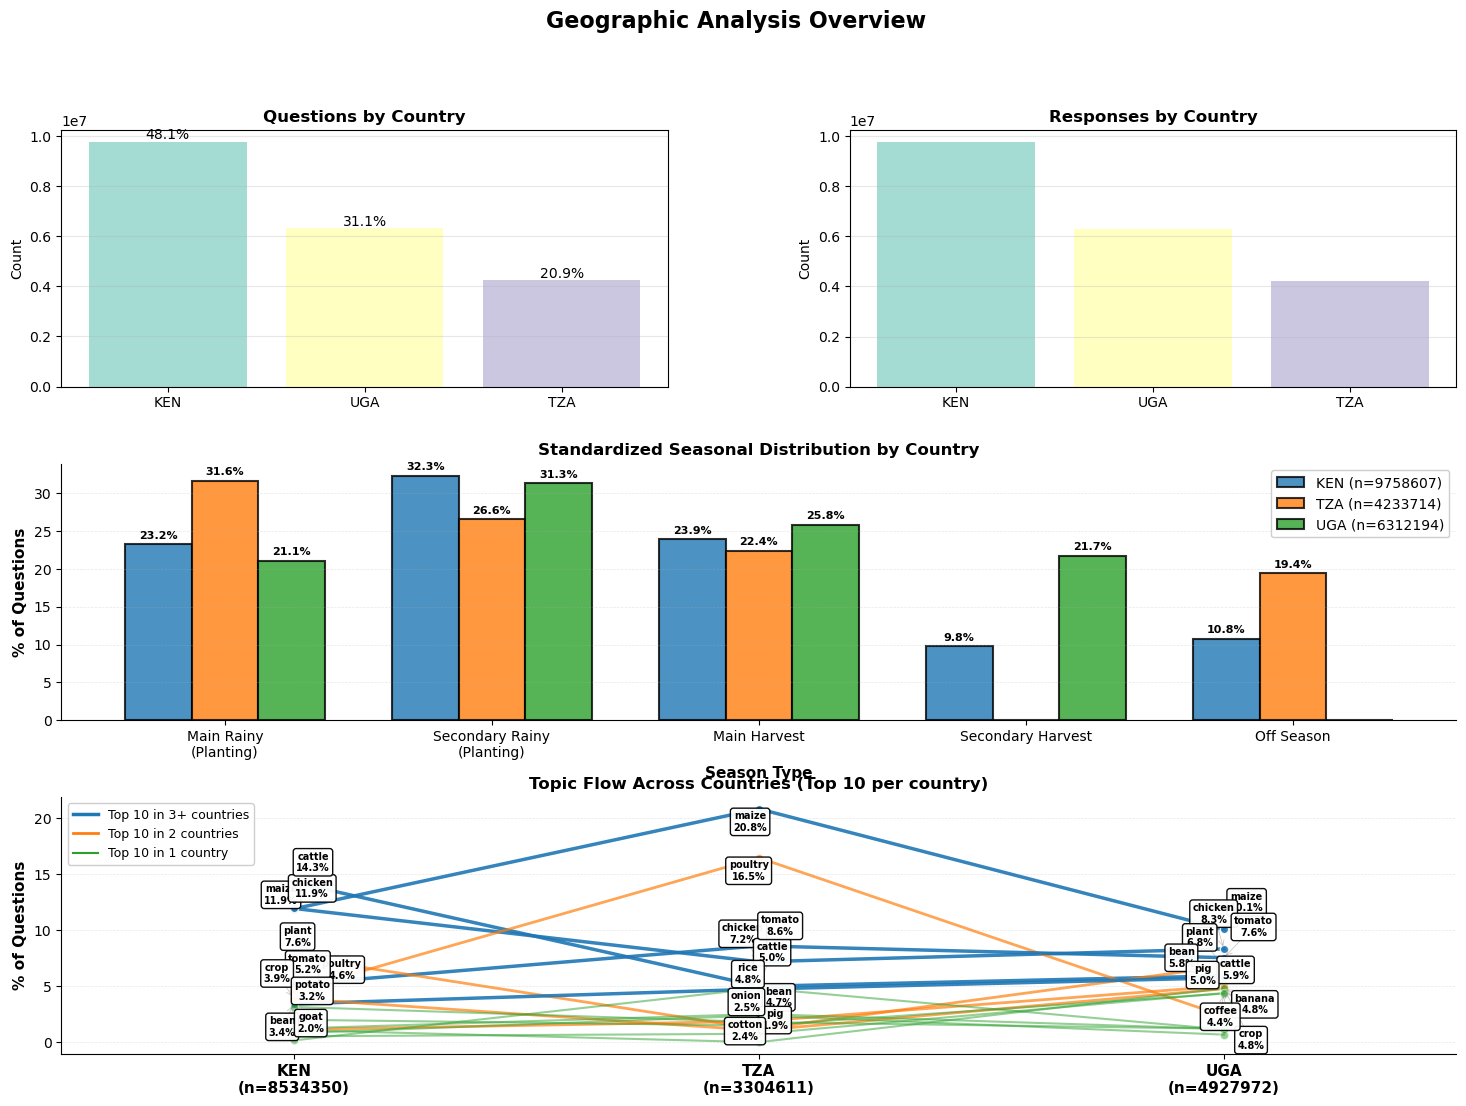

In [7]:
fig = WeFarmPy.EDA.plot_geographic_overview(df_sample_clean)

- Filtered out country code 'gb' - are these tests sent from the UK? V. small % of responses
- There are fewer questions coming from Tanzania (presumably WeFarm had a lower presence there?)
- Seems that on average, a greater % of questions are asked in the rainy seasons than the harvest seasons, thgouh in Tanzania, roughly 1/5th of all questions were asked 'off-season'.
- There is a fair bit of overlap in question categories. between countires - chicken and maize are two of the most common topics in all three countries. Cattle feature much more in Kenya than other countries.

# Language analysis

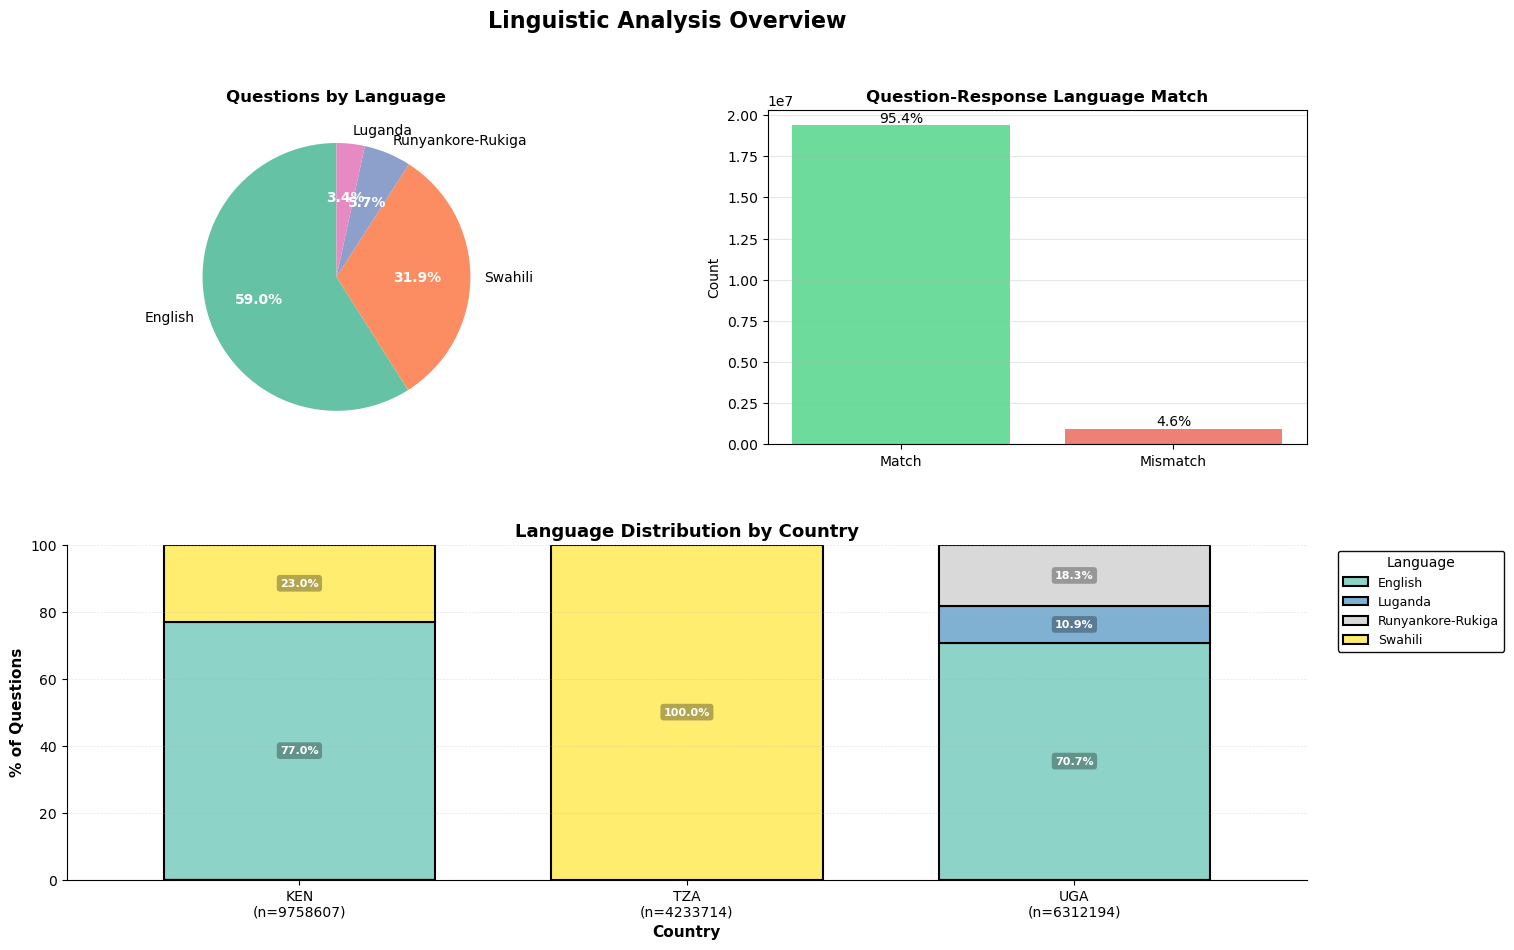

In [8]:
fig = WeFarmPy.EDA.plot_linguistic_overview(df_sample_clean)

- Almost 60% of all answers are in English
- All Tanzanian and some Kenyan responses are in Swahili
- Ugandan has ~20% of its responses in Runyankore, and ~10% in Luganda
- 95% of questions are answered in the same language

# User analysis

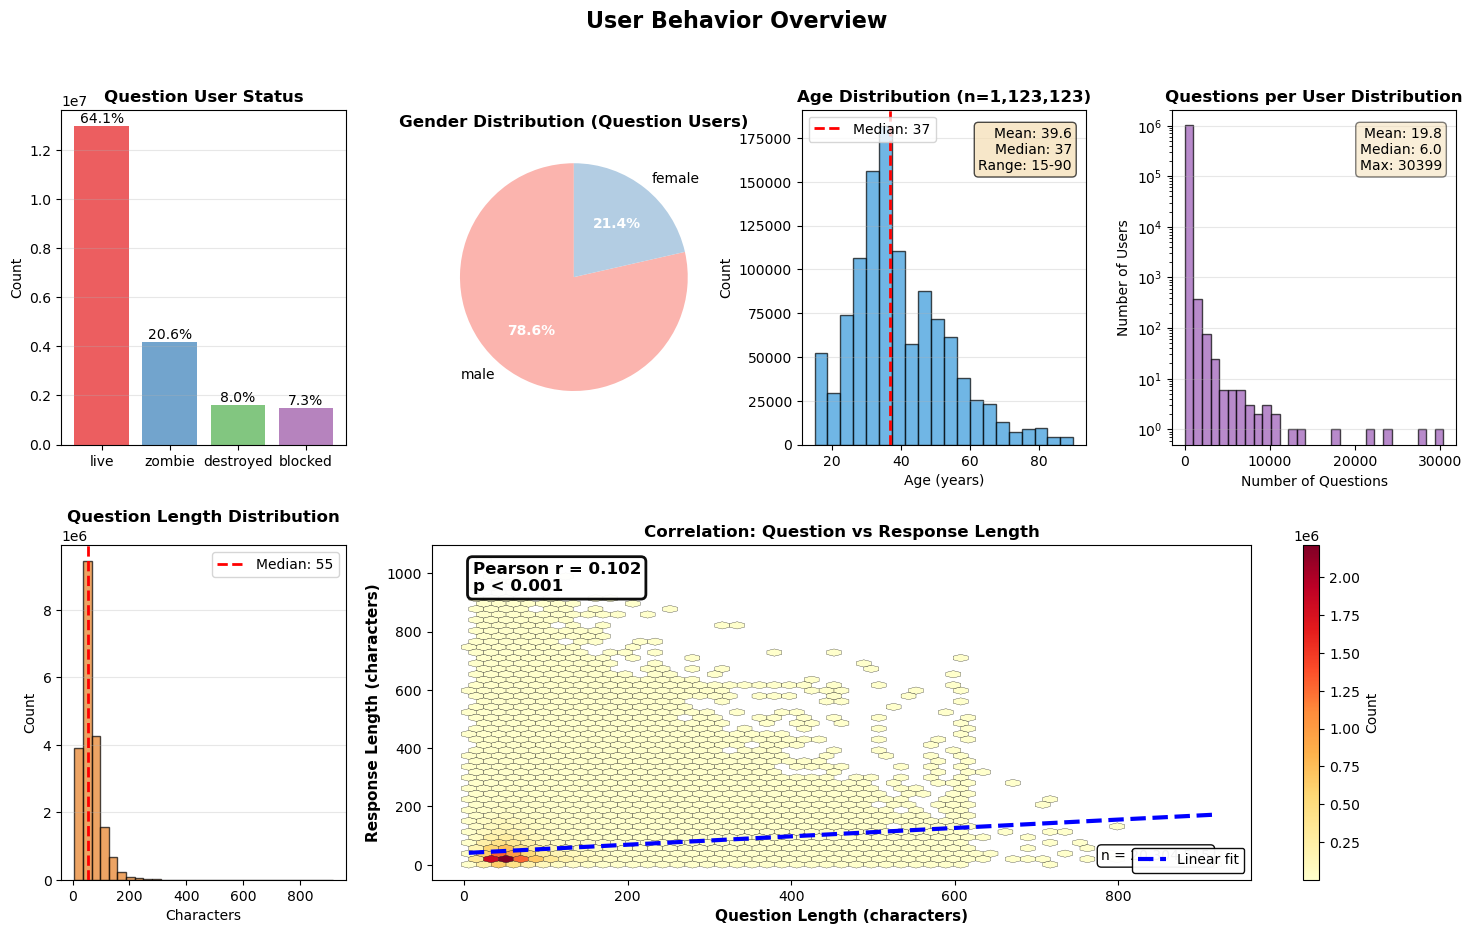

In [9]:
fig = WeFarmPy.EDA.plot_user_overview(df_sample_clean)

- Most users (~80%) are male
- Very little correlation between question length and response length, average is about 50 characters
- Most users about 40 years old
- The average user sent 5 to 20 questions, though there were also some very active users (>10000 questions each)


# Data quality

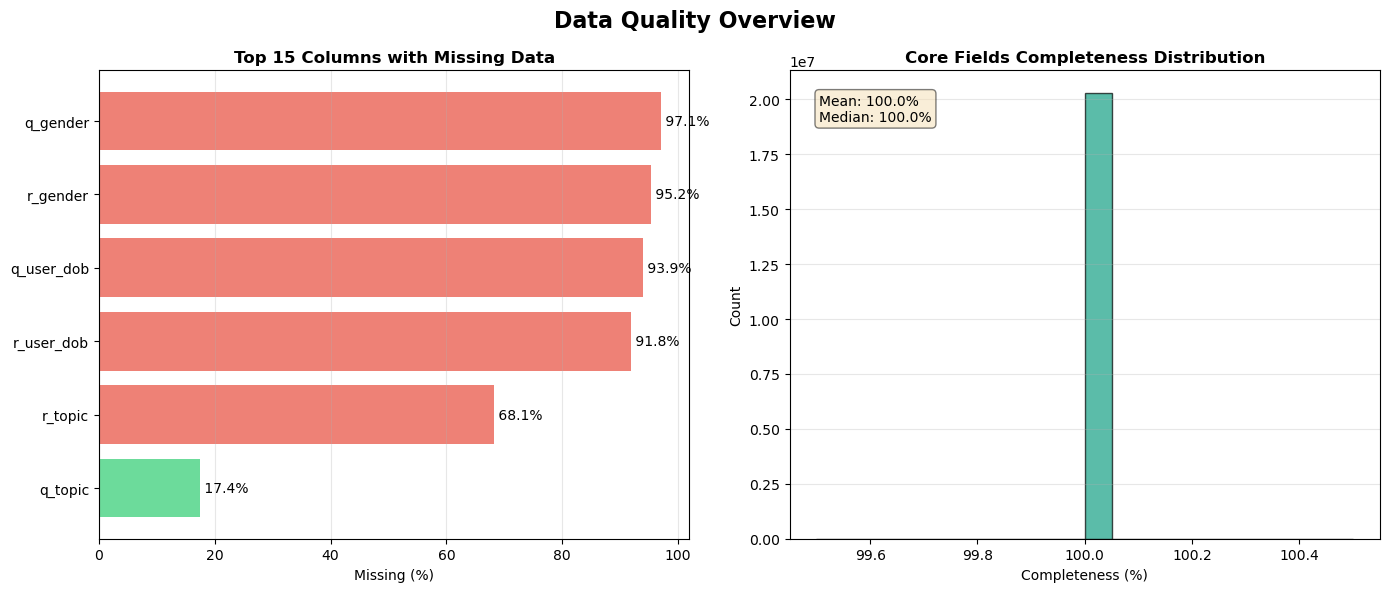

In [10]:
fig = WeFarmPy.EDA.plot_data_quality(df_sample_clean)

- All questions have basic 'core' fields (question, response, time, country)
- User metadata appears to be some of the most lacking fields - >80% are missing gender and DOB.